In [1]:
%matplotlib inline

import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import time
import sys

sys.path.append("..")

mpl.style.use("classic")
mpl.rcParams["figure.figsize"] = [5, 3]

mpl.rcParams["axes.linewidth"] = 0.75
mpl.rcParams["grid.linewidth"] = 0.75
mpl.rcParams["lines.linewidth"] = 0.75
mpl.rcParams["patch.linewidth"] = 0.75
mpl.rcParams["xtick.major.size"] = 3
mpl.rcParams["ytick.major.size"] = 3

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42
mpl.rcParams["font.size"] = 9
mpl.rcParams["axes.titlesize"] = 10
mpl.rcParams["legend.fontsize"] = "medium"

print("matplotlib %s" % mpl.__version__)
print('Successful!')

from bandits.simulator import *
from bandits.algorithms import *
from bandits.phe import *
from bandits.hse import *

def linestyle2dashes(style):
  if style == "--":
    return (3, 3)
  elif style == ":":
    return (0.5, 2.5)
  else:
    return (None, None)

matplotlib 3.2.2
Successful!


Evaluating TS...........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

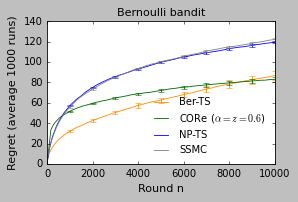

In [2]:
import datetime

algs = [
    
    ("TS", {}, "darkorange", "-", r"Ber-TS"),
#     ("GaussTS", {"sigma": 0.2}, "red", "-", r"Gauss-TS ($\sigma = 0.2$)"),
#     ("GaussTS", {"sigma": 0.6}, "purple", "-", r"Gauss-TS ($\sigma = 0.6$)"),
#     ("PHE", {"a": 0.5, "pseudo_reward": "bernoulli"}, "darkorange", "-", 
#          r"Ber-PHE ($a = 0.5$)"),
#     ("PHE", {"a": 0.2, "pseudo_reward": "Gauss"}, "darkorange", "-", 
#            r"Gauss-PHE ($a = 0.2$)"),
#     ("PHE", {"a": 0.9, "pseudo_reward": "Gauss"}, "gold", "-", "Gauss-PHE (a = 0.9)"),
#     ("PHE", {"a": 0.5}, "gold", "-", "PHE (a = 0.4, bernoulli)"),
    ("HS_SWR_scale", {"sample_portion": 0.6, 'z': 0.6}, "darkgreen", "-", 
           r"CORe ($\alpha = z = 0.6$)"),
#     ("HS_SWR_scale", {"sample_portion": 0.4, 'z': 0.4}, "darkorange", "-", 
#            r"CORe ($\alpha = z = 0.4$)"),
#     ("HS_SWR_scale", {"sample_portion": 0.5, 'z': 0.5}, "black", "-", 
#            r"CORe ($\alpha = z = 0.5)"),
#     ("UCB1", {}, "cyan", "-", "UCB1"),
#     ("UCBV", {}, "gray", "-", "UCB-V"),
#     ("HS_SWR", {"sample_portion": 0.6, 'z': 0.6}, "black", "-", 
#            "HS_SWR (a:0.6,z:0.6)"),
#     ("HS_SWR", {"sample_portion": 1.0, 'z': 0.6}, "blue", "-", 
#            "HS_SWR (a:1.0,z:0.6)"),
  #   ("HS_SWR_MirrorPool", {"sample_portion": 0.5}, "black", "-", 
  #            "HS_SWR_mirror (sample_portion = 0.5)"),
#     ("MNomialTS", {"M":2}, "blue", "-", r"NP-TS ($M = 2$)"),
    ("NonParaTS", {}, "blue", "-", r"NP-TS"),
    ("SSMC", {}, "gray", "-", r"SSMC"),
]
num_runs = 1000
n = 10000
K = 10
noise = 'ber'

step = np.arange(1, n + 1)
sube = (step.size // 10) * np.arange(1, 11) - 1

plt.figure(figsize=(3.8, 2.6))
for fig in range(1):
  env = []
  for run in range(num_runs):
#     mu = np.random.rand(K)
    mu = 0.5 * np.random.rand(K) + 0.25
    if noise == 'ber':
        env.append(BerBandit(mu))
    elif noise == 'beta':
        env.append(BetaBandit(mu))
    elif noise == 'gauss':
        env.append(GaussBandit(mu, sigma=0.2))

#     if fig == 0:
#       env.append(GaussBandit(mu, sigma=1.5))
#     elif fig == 1:
#       env.append(BetaBandit(mu))
#     else:
#       env.append(GaussBandit(mu))

  plt.subplot(1, 1, fig + 1)
  #plt.subplot(1, 1, 1)
  alg_num = 0
  for alg in algs:
    alg_class = globals()[alg[0]]
    regret, _ = evaluate_parallel(alg_class, alg[1], env, n, num_process=13)

    cum_regret = regret.cumsum(axis=0)
    plt.plot(step, cum_regret.mean(axis=1),
      alg[2], dashes=linestyle2dashes(alg[3]),
      label=alg[4]) 
    plt.errorbar(step[sube], cum_regret[sube, :].mean(axis=1),
      cum_regret[sube, :].std(axis=1) / np.sqrt(cum_regret.shape[1]),
      fmt="none", ecolor=alg[2], capsize=2.5)

    alg_num += 1

  if fig == 0:
    if noise == 'ber':
        plt.title("Bernoulli bandit")
    elif noise == 'beta':
        plt.title("Beta bandit")
    elif noise == 'gauss':
        plt.title(r"Gaussian bandit, $\sigma = 0.2$")
    
  plt.xlabel("Round n",size=10)
#   plt.ylim(bottom=1, top=1000)
#   plt.yscale("log")

  if not fig:
    plt.ylabel("Regret (average {} runs)".format(num_runs),size=10)
  if fig <= 2:
    plt.legend(loc="best", frameon=False)
#   plt.legend(loc="upper left", bbox_to_anchor=(1,1), frameon=False)

plt.tight_layout()

now = datetime.datetime.now()
with open("../aistats_exp_results/compare_baselines_meanrange05_{}_{}_{}_{}_{}.pdf". \
          format(noise, now.month, now.day, now.hour, now.minute), "wb") as f:
      plt.savefig(f, format="pdf", dpi=1200, bbox_inches=0)
plt.show()

Evaluating Gaussian TS..................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

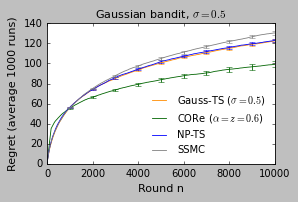

In [6]:
import datetime

algs = [
    
#     ("TS", {}, "darkorange", "-", r"Ber-TS"),
    ("GaussTS", {"sigma": 0.5}, "darkorange", "-", r"Gauss-TS ($\sigma = 0.5$)"),
#     ("GaussTS", {"sigma": 0.6}, "purple", "-", r"Gauss-TS ($\sigma = 0.6$)"),
#     ("PHE", {"a": 0.5, "pseudo_reward": "bernoulli"}, "darkorange", "-", 
#          r"Ber-PHE ($a = 0.5$)"),
#     ("PHE", {"a": 0.2, "pseudo_reward": "Gauss"}, "darkorange", "-", 
#            r"Gauss-PHE ($a = 0.2$)"),
#     ("PHE", {"a": 0.9, "pseudo_reward": "Gauss"}, "gold", "-", "Gauss-PHE (a = 0.9)"),
#     ("PHE", {"a": 0.5}, "gold", "-", "PHE (a = 0.4, bernoulli)"),
    ("HS_SWR_scale", {"sample_portion": 0.6, 'z': 0.6}, "darkgreen", "-", 
           r"CORe ($\alpha = z = 0.6$)"),
#     ("HS_SWR_scale", {"sample_portion": 0.4, 'z': 0.4}, "darkorange", "-", 
#            r"CORe ($\alpha = z = 0.4$)"),
#     ("HS_SWR_scale", {"sample_portion": 0.5, 'z': 0.5}, "black", "-", 
#            r"CORe ($\alpha = z = 0.5)"),
#     ("UCB1", {}, "cyan", "-", "UCB1"),
#     ("UCBV", {}, "gray", "-", "UCB-V"),
#     ("HS_SWR", {"sample_portion": 0.6, 'z': 0.6}, "black", "-", 
#            "HS_SWR (a:0.6,z:0.6)"),
#     ("HS_SWR", {"sample_portion": 1.0, 'z': 0.6}, "blue", "-", 
#            "HS_SWR (a:1.0,z:0.6)"),
  #   ("HS_SWR_MirrorPool", {"sample_portion": 0.5}, "black", "-", 
  #            "HS_SWR_mirror (sample_portion = 0.5)"),
    ("NonParaTS", {}, "blue", "-", r"NP-TS"),
    ("SSMC", {}, "gray", "-", r"SSMC"),
]
num_runs = 1000
n = 10000
K = 10
noise = 'gauss'

step = np.arange(1, n + 1)
sube = (step.size // 10) * np.arange(1, 11) - 1

plt.figure(figsize=(3.8, 2.6))
for fig in range(1):
  env = []
  for run in range(num_runs):
#     mu = np.random.rand(K)
    mu = 0.5 * np.random.rand(K) + 0.25
    if noise == 'ber':
        env.append(BerBandit(mu))
    elif noise == 'beta':
        env.append(BetaBandit(mu))
    elif noise == 'gauss':
        env.append(GaussBandit(mu, sigma=0.5))

#     if fig == 0:
#       env.append(GaussBandit(mu, sigma=1.5))
#     elif fig == 1:
#       env.append(BetaBandit(mu))
#     else:
#       env.append(GaussBandit(mu))

  plt.subplot(1, 1, fig + 1)
  #plt.subplot(1, 1, 1)
  alg_num = 0
  for alg in algs:
    alg_class = globals()[alg[0]]
    regret, _ = evaluate_parallel(alg_class, alg[1], env, n, num_process=3)

    cum_regret = regret.cumsum(axis=0)
    plt.plot(step, cum_regret.mean(axis=1),
      alg[2], dashes=linestyle2dashes(alg[3]),
      label=alg[4]) 
    plt.errorbar(step[sube], cum_regret[sube, :].mean(axis=1),
      cum_regret[sube, :].std(axis=1) / np.sqrt(cum_regret.shape[1]),
      fmt="none", ecolor=alg[2], capsize=2.5)

    alg_num += 1

  if fig == 0:
    if noise == 'ber':
        plt.title("Bernoulli bandit")
    elif noise == 'beta':
        plt.title("Beta bandit")
    elif noise == 'gauss':
        plt.title(r"Gaussian bandit, $\sigma = 0.5$")
    
  plt.xlabel("Round n",size=10)
#   plt.ylim(bottom=1, top=1000)
#   plt.yscale("log")

  if not fig:
    plt.ylabel("Regret (average {} runs)".format(num_runs),size=10)
  if fig <= 2:
    plt.legend(loc="best", frameon=False)
#   plt.legend(loc="upper left", bbox_to_anchor=(1,1), frameon=False)

plt.tight_layout()

now = datetime.datetime.now()
with open("../aistats_exp_results/compare_baselines_meanrange05_{}_{}_{}_{}_{}.pdf". \
          format(noise, now.month, now.day, now.hour, now.minute), "wb") as f:
      plt.savefig(f, format="pdf", dpi=1200, bbox_inches=0)
plt.show()

Evaluating Gaussian TS.................................................................................................... 3.3 seconds
Regret: 31.09 +/- 1.99 (median: 26.40, max: 183.81, min: 8.38)
Evaluating Gaussian TS.................................................................................................... 3.3 seconds
Regret: 148.50 +/- 2.50 (median: 144.36, max: 218.01, min: 93.25)
Evaluating PHE.................................................................................................... 6.3 seconds
Regret: 41.30 +/- 1.73 (median: 36.42, max: 96.79, min: 12.35)
Evaluating PHE.................................................................................................... 6.2 seconds
Regret: 118.39 +/- 2.31 (median: 116.71, max: 184.55, min: 62.81)
Evaluating HS-SampleWithReplacement.................................................................................................... 95.6 seconds
Regret: 45.02 +/- 2.13 (median: 42.46, max: 222.77, min: 24.19)


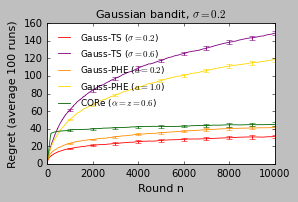

In [48]:
import datetime

algs = [
    
#     ("TS", {}, "red", "-", r"Ber-TS"),
    ("GaussTS", {"sigma": 0.2}, "red", "-", r"Gauss-TS ($\sigma = 0.2$)"),
    ("GaussTS", {"sigma": 0.6}, "purple", "-", r"Gauss-TS ($\sigma = 0.6$)"),
#     ("PHE", {"a": 0.5, "pseudo_reward": "bernoulli"}, "darkorange", "-", 
#          r"Ber-PHE ($a = 0.5$)"),
    ("PHE", {"a": 0.2, "pseudo_reward": "Gauss"}, "darkorange", "-", 
           r"Gauss-PHE ($a = 0.2$)"),
    ("PHE", {"a": 1.0, "pseudo_reward": "Gauss"}, "gold", "-", r"Gauss-PHE ($a = 1.0$)"),
#     ("PHE", {"a": 0.5}, "gold", "-", "PHE (a = 0.4, bernoulli)"),
    ("HS_SWR_scale", {"sample_portion": 0.6, 'z': 0.6}, "darkgreen", "-", 
           r"CORe ($\alpha = z = 0.6$)"),
#     ("UCB1", {}, "cyan", "-", "UCB1"),
#     ("UCBV", {}, "gray", "-", "UCB-V"),
]
num_runs = 100
n = 10000
K = 10

step = np.arange(1, n + 1)
sube = (step.size // 10) * np.arange(1, 11) - 1

plt.figure(figsize=(3.8, 2.6))
for fig in range(1):
  env = []
  for run in range(num_runs):
    mu = 0.5 * np.random.rand(K) + 0.25
#     env.append(BerBandit(mu))
#     env.append(BetaBandit(mu))
    env.append(GaussBandit(mu, sigma=0.2))

#     if fig == 0:
#       env.append(GaussBandit(mu, sigma=1.5))
#     elif fig == 1:
#       env.append(BetaBandit(mu))
#     else:
#       env.append(GaussBandit(mu))

  plt.subplot(1, 1, fig + 1)
  #plt.subplot(1, 1, 1)
  alg_num = 0
  for alg in algs:
    alg_class = globals()[alg[0]]
    regret, _ = evaluate_parallel(alg_class, alg[1], env, n, num_process=13)

    cum_regret = regret.cumsum(axis=0)
    plt.plot(step, cum_regret.mean(axis=1),
      alg[2], dashes=linestyle2dashes(alg[3]),
      label=alg[4]) # if alg_num // 3 == fig or alg[0]=='GaussTS' else None)
    plt.errorbar(step[sube], cum_regret[sube, :].mean(axis=1),
      cum_regret[sube, :].std(axis=1) / np.sqrt(cum_regret.shape[1]),
      fmt="none", ecolor=alg[2], capsize=2.5)

    alg_num += 1

  if fig == 0:
#     plt.title("Bernoulli bandit")
#     plt.title("Beta bandit")
    plt.title(r"Gaussian bandit, $\sigma = 0.2$")
    
  plt.xlabel("Round n",size=10)
  plt.ylim(bottom=0)
#   plt.yscale("log")

  if not fig:
    plt.ylabel("Regret (average {} runs)".format(num_runs),size=10)
  if fig <= 2:
    plt.legend(loc="upper left", ncol=1, frameon=False, fontsize=8)
#   plt.legend(loc="upper left", bbox_to_anchor=(1,1), frameon=False)

plt.tight_layout()

now = datetime.datetime.now()
with open("../aistats_exp_results/compare_baselines_gauss_cross02_{}_{}_{}_{}.pdf". \
          format(now.month, now.day, now.hour, now.minute), "wb") as f:
      plt.savefig(f, format="pdf", dpi=1200, bbox_inches=0)
plt.show()

In [29]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
import datetime

# uniform_data = np.random.rand(10, 12)
zlabels = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
alphalabels = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]
alphalabels = alphalabels[::-1]

# ax = sns.heatmap(uniform_data, xticklabels=xticklabels)
z_length = int(len(zlabels))
a_length = int(len(alphalabels))

regret_mtx = np.zeros((a_length, z_length))

num_runs = 52
n = 10000
K = 10

plt.figure(figsize=(4, 4))
algs = ['HS_SWR_scale']
colors = {'HS_SWR_scale':'darkgreen'}

for fig in range(1):
  env = []
  for run in range(num_runs):
    mu = 0.5 * np.random.rand(K) + 0.25
    if fig == 0:
      env.append(GaussBandit(mu,sigma=1.0))

  for alg in algs:
    alg_class = globals()[alg]
    regret_means = []
    regret_vars = []
    for i, sample_portion in enumerate(alphalabels):
        for j, init_var in enumerate(zlabels):
            print("init_var: ", init_var, " alpha: ", sample_portion)
#             sample_portion = np.sqrt(alphasquare)
            regret, _ = evaluate_parallel(alg_class, 
                {"sample_portion": sample_portion, "z": init_var}, env, n, num_process=13)
            cum_regret = regret.sum(axis=0)
#             regret_means.append(cum_regret.mean())
#             regret_vars.append(cum_regret.std()/np.sqrt(num_runs))
            
            regret_mtx[i,j] = int(cum_regret.mean())

#     plt.plot(x_axis, regret_means, dashes=linestyle2dashes('-'), color='darkgreen',
#              label=r'CORe: $\alpha^2z=0.2$')
#     plt.errorbar(x_axis, regret_means, regret_vars, ecolor='darkgreen', fmt="none")
#     plt.xticks(x_axis, init_var_labels)
  ax = sns.heatmap(regret_mtx, 
                   xticklabels=zlabels, yticklabels=alphalabels)
  plt.title(r"Gaussian bandit, $\sigma = 1.0$")
  plt.xlabel(r"Initial variance ratio $z$",size=10)
  plt.ylabel(r"Scaling ratio $\alpha$",size=10)

plt.tight_layout()
now = datetime.datetime.now()
with open("../aistats_exp_results/core_tune_gauss_{}_{}_{}_{}.pdf" \
          .format(now.month, now.day, now.hour, now.minute), "wb") as f:
    plt.savefig(f, format="pdf", dpi=1200, bbox_inches=0)
plt.show()


init_var:  0.2  alpha:  1.2
Evaluating HS-SampleWithReplacement.................................................... 53.7 seconds
Regret: 382.61 +/- 14.57 (median: 387.52, max: 850.94, min: 116.37)
init_var:  0.3  alpha:  1.2
Evaluating HS-SampleWithReplacement.................................................... 50.8 seconds
Regret: 380.08 +/- 14.85 (median: 383.87, max: 573.09, min: 143.26)
init_var:  0.4  alpha:  1.2
Evaluating HS-SampleWithReplacement.................................................... 51.2 seconds
Regret: 416.66 +/- 14.01 (median: 387.45, max: 757.64, min: 235.12)
init_var:  0.5  alpha:  1.2
Evaluating HS-SampleWithReplacement.................................................... 53.3 seconds
Regret: 393.15 +/- 13.43 (median: 371.98, max: 673.79, min: 158.85)
init_var:  0.6  alpha:  1.2
Evaluating HS-SampleWithReplacement.................................................... 50.1 seconds
Regret: 400.87 +/- 14.04 (median: 390.96, max: 620.62, min: 172.80)
init_var:  0.7 

Evaluating HS-SampleWithReplacement.......................... 25.7 seconds
Regret: 297.81 +/- 50.44 (median: 177.87, max: 1197.44, min: 77.32)
Evaluating HS-SampleWithReplacement.......................... 27.3 seconds
Regret: 440.29 +/- 91.65 (median: 184.55, max: 1785.02, min: 46.49)
Evaluating HS-SampleWithReplacement.......................... 27.6 seconds
Regret: 242.90 +/- 55.94 (median: 140.09, max: 1133.82, min: -114.08)
Evaluating HS-SampleWithReplacement.......................... 27.4 seconds
Regret: 225.94 +/- 68.40 (median: 111.91, max: 1442.22, min: -152.43)


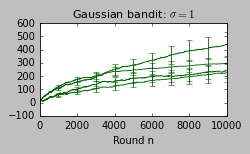

In [19]:
import datetime

algs = [
#     ("UCBV", {}, "gray", "-", "UCB-V"),
#     ("UCB1", {}, "cyan", "-", "UCB1"),
#     ("GaussTS", {"sigma":0.2}, "red", "-", "TS"),
#     ("GaussTS", {"sigma":0.5}, "red", "-", "TS"),
#     ("PHE", {"a": 0.2, "pseudo_reward": "bernoulli"}, "darkorange", "-", "PHE (a = 0.2)"),
#     ("PHE", {"a": 1.2, "pseudo_reward": "Gauss"}, "darkorange", "-", "PHE (a = 1.2)"),
#     ("PHE", {"a": 1.0, "pseudo_reward": "Gauss"}, "gold", "-", "PHE (a = 1.0)"),
#     ("PHE", {"a": 0.5, "pseudo_reward": "Gauss"}, "red", "-", "PHE (a = 0.5)"),
    ("HS_SWR_scale", {"sample_portion": 0.5, 'z': 0.5}, "darkgreen", "-", 
           r"CORe ($\alpha$ = 0.5, z = 0.5)"),
    ("HS_SWR_scale", {"sample_portion": 0.4, 'z': 0.5}, "darkgreen", "-", 
           r"CORe ($\alpha$ = 0.4, z = 0.5)"),
    ("HS_SWR_scale", {"sample_portion": 0.5, 'z': 0.4}, "darkgreen", "-", 
           r"CORe ($\alpha$ = 0.5, z = 0.4)"),
    ("HS_SWR_scale", {"sample_portion": 0.4, 'z': 0.4}, "darkgreen", "-", 
           r"CORe ($\alpha$ = 0.4, z = 0.4)"),
]

num_runs = 26
n = 10000
K = 10

step = np.arange(1, n + 1)
sube = (step.size // 10) * np.arange(1, 11) - 1

plt.figure(figsize=(3.2, 2))
for fig in range(1):
  env = []
  for run in range(num_runs):
    mu = 0.5 * np.random.rand(K) + 0.25
    if fig == 0:
      env.append(GaussBandit(mu,sigma=1))
#       env.append(BetaBandit(mu))

  plt.subplot(1, 1, fig + 1)
  alg_num = 0
  for alg in algs:
    alg_class = globals()[alg[0]]
    regret, _ = evaluate_parallel(alg_class, alg[1], env, n, num_process=13)

    cum_regret = regret.cumsum(axis=0)
    plt.plot(step, cum_regret.mean(axis=1),
      alg[2], dashes=linestyle2dashes(alg[3]))
    plt.errorbar(step[sube], cum_regret[sube, :].mean(axis=1),
      cum_regret[sube, :].std(axis=1) / np.sqrt(cum_regret.shape[1]),
      fmt="none", ecolor=alg[2])

    alg_num += 1

  if fig == 0:
    plt.title(r"Gaussian bandit: $\sigma=1$")
    
#   plt.ylim(0, 400)
  plt.xlabel("Round n")
#   if not fig:
#     plt.ylabel("Regret (average {} runs)".format(num_runs))
#   if fig <= 2:
#     plt.legend(loc="upper left", frameon=False)

plt.tight_layout()

now = datetime.datetime.now()
# with open("../aistats_exp_results/compare_baselines_{}_{}_{}_{}.jpeg". \
#           format(now.month, now.day, now.hour, now.minute), "wb") as f:
#       plt.savefig(f, format="jpeg", dpi=1200, bbox_inches=0)
plt.show()

Evaluating Gaussian TS.......... 1.0 seconds
Regret: 46.49 +/- 4.28 (median: 47.56, max: 61.25, min: 14.82)
Evaluating PHE.......... 2.1 seconds
Regret: 69.22 +/- 5.34 (median: 65.11, max: 108.63, min: 43.06)
Evaluating HS-SampleWithReplacement.......... 67.8 seconds
Regret: 16.36 +/- 3.23 (median: 12.77, max: 44.78, min: 7.57)


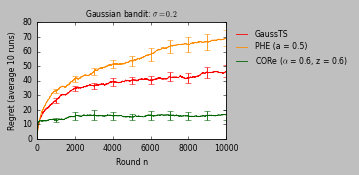

In [51]:
import datetime

algs = [
#     ("GaussTS", {"crs":2.5}, "purple", "-", "GaussTS"),
#     ("PHE", {"a": 0.2}, "gold", "-", "PHE (a = 0.2)"),
    ("GaussTS", {"crs":2.}, "red", "-", "GaussTS"),
    ("PHE", {"a": 0.2}, "darkorange", "-", "PHE (a = 0.5)"),
#     ("PHE", {"a": 0.5}, "gold", "-", "PHE (a = 0.4, bernoulli)"),
    ("HS_SWR_scale", {"sample_portion": 0.2, 'z': 0.4}, "darkgreen", "-", 
           r"CORe ($\alpha$ = 0.6, z = 0.6)"),
]

num_runs = 10
n = 10000
K = 10

step = np.arange(1, n + 1)
sube = (step.size // 10) * np.arange(1, 11) - 1

plt.figure(figsize=(4.5, 2.2))
for fig in range(1):
  env = []
  for run in range(num_runs):
    mu = 0.5 * np.random.rand(K) + 0.25
    if fig == 0:
      env.append(GaussBandit(mu, sigma=0.2))

  plt.subplot(1, 1, fig + 1)
  alg_num = 0
  for alg in algs:
    alg_class = globals()[alg[0]]
    regret, _ = evaluate_parallel(alg_class, alg[1], env, n, num_process=2)

    cum_regret = regret.cumsum(axis=0)
    plt.plot(step, cum_regret.mean(axis=1),
      alg[2], dashes=linestyle2dashes(alg[3]),
      label=alg[4])
    plt.errorbar(step[sube], cum_regret[sube, :].mean(axis=1),
      cum_regret[sube, :].std(axis=1) / np.sqrt(cum_regret.shape[1]),
      fmt="none", ecolor=alg[2])

    alg_num += 1

  if fig == 0:
    plt.title(r"Gaussian bandit: $\sigma=0.2$")
    
#   plt.ylim(0, 400)
  plt.xlabel("Round n")
  plt.ylabel("Regret (average {} runs)".format(num_runs))
  plt.legend(loc="upper left", bbox_to_anchor=(1,1), frameon=False)

#   if not fig:
#     plt.ylabel("Regret (average {} runs)".format(num_runs))
#   if fig <= 2:
#     plt.legend(loc="upper left", frameon=False)

plt.tight_layout()

now = datetime.datetime.now()
# with open("../aistats_exp_results/compare_baselines_gauss_{}_{}_{}_{}.jpeg". \
#           format(now.month, now.day, now.hour, now.minute), "wb") as f:
#       plt.savefig(f, format="jpeg", dpi=1200, bbox_inches=0)
plt.show()

In [ ]:
import datetime

algs = [
    ("UCBV", {}, "gray", "-", "UCB-V"),
    ("UCB1", {}, "cyan", "-", "UCB1"),
    ("GaussTS", {"crs":1.2}, "red", "-", "TS"),
    ("PHE", {"a": 1.1}, "darkorange", "-", "PHE (a = 1.1)"),
#     ("PHE", {"a": 0.5}, "gold", "-", "PHE (a = 0.4, bernoulli)"),
    ("HS_SWR", {"sample_portion": 0.4, 'z': 0.6}, "darkgreen", "-", 
           r"CORe ($\alpha$ = 0.4, z = 0.6)"),
]

num_runs = 100
n = 10000
K = 10

step = np.arange(1, n + 1)
sube = (step.size // 10) * np.arange(1, 11) - 1

plt.figure(figsize=(3.2, 2))
for fig in range(1):
  env = []
  for run in range(num_runs):
    mu = 0.5 * np.random.rand(K) + 0.25
    if fig == 0:
      env.append(GaussBandit(mu))

  plt.subplot(1, 1, fig + 1)
  alg_num = 0
  for alg in algs:
    alg_class = globals()[alg[0]]
    regret, _ = evaluate_parallel(alg_class, alg[1], env, n, num_process=13)

    cum_regret = regret.cumsum(axis=0)
    plt.plot(step, cum_regret.mean(axis=1),
      alg[2], dashes=linestyle2dashes(alg[3]))
    plt.errorbar(step[sube], cum_regret[sube, :].mean(axis=1),
      cum_regret[sube, :].std(axis=1) / np.sqrt(cum_regret.shape[1]),
      fmt="none", ecolor=alg[2])

    alg_num += 1

  if fig == 0:
    plt.title(r"Gaussian bandit: $\sigma=0.5$")
  elif fig == 1:
    plt.title("Beta bandit")
  else:
    plt.title("Gaussian bandit")
  plt.ylim(0, 400)
  plt.xlabel("Round n")
#   if not fig:
#     plt.ylabel("Regret (average {} runs)".format(num_runs))
#   if fig <= 2:
#     plt.legend(loc="upper left", frameon=False)

plt.tight_layout()

now = datetime.datetime.now()
# with open("../aistats_exp_results/compare_baselines_{}_{}_{}_{}.jpeg". \
#           format(now.month, now.day, now.hour, now.minute), "wb") as f:
#       plt.savefig(f, format="jpeg", dpi=1200, bbox_inches=0)
plt.show()

 28: 0.21 0.81 |  12: 0.18 0.83 |  40: 0.19 0.81 |  21: 0.12 0.87 |  29: 0.12 0.79 |  30: 0.18 0.82 |  40: 0.13 0.91 |  44: 0.17 0.75 |  47: 0.21 0.87 |  27: 0.15 0.89 | 
 35: 0.23 0.89 |  39: 0.16 0.85 |  31: 0.13 0.88 |  13: 0.15 0.84 |   3: 0.09 0.81 |  28: 0.20 0.88 |  40: 0.20 0.78 |  39: 0.16 0.87 |  33: 0.05 0.88 |  47: 0.17 0.78 | 
  3: 0.18 0.88 |  28: 0.19 0.80 |  44: 0.22 0.79 |   0: 0.17 0.74 |   7: 0.11 0.82 |  20: 0.10 0.87 |   4: 0.19 0.80 |   6: 0.13 0.82 |  14: 0.23 0.74 |   7: 0.17 0.84 | 
 37: 0.17 0.95 |  16: 0.09 0.84 |  23: 0.09 0.86 |  42: 0.09 0.79 |  26: 0.11 0.85 |  32: 0.25 0.78 |  34: 0.07 0.80 |  17: 0.09 0.75 |  33: 0.21 0.86 |  11: 0.23 0.90 | 
 45: 0.12 0.88 |  23: 0.14 0.89 |  13: 0.12 0.87 |   1: 0.16 0.83 |  23: 0.14 0.80 |   0: 0.16 0.88 |   5: 0.13 0.79 |   5: 0.20 0.78 |  42: 0.10 0.80 |   6: 0.20 0.82 | 
 13: 0.21 0.90 |  44: 0.23 0.86 |  29: 0.11 0.83 |  14: 0.17 0.92 |  11: 0.10 0.86 |  38: 0.13 0.86 |  45: 0.11 0.84 |  44: 0.08 0.93 |  48: 0.15

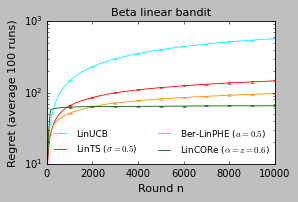

In [33]:
import datetime

reward_noise = "beta"

algs = [
  ("LinUCB", {}, "cyan", "-", "LinUCB"),
#   ("LinTS", {"sigma":0.6}, "red", "-", "LinTS"),
    ("LinTS", {"sigma":0.5}, "red", "-", r"LinTS ($\sigma=0.5$)"),
#     ("LinTS", {"sigma":0.9}, "red", "-", "LinTS"),
#   ("LinGreedy", {}, "blue", "-", "$\\varepsilon$-greedy"),
  #("LinPHE", {"a": 2}, "red", "-", "LinPHE (a = 2)"),
  #("LinPHE", {"a": 1}, "darkorange", "-", "LinPHE (a = 1)"),
  ("LinPHE", {"a": 0.5}, "darkorange", "-", r"Ber-LinPHE ($a = 0.5$)"),
#     ("LinPHE", {"a": 1}, "darkorange", "-", "LinPHE (a = 0.5)"),
#     ("LinPHE", {"a": 1.5}, "darkorange", "-", "LinPHE (a = 0.5)"),
  #("LinHistorySwap", {"swap_prob": 0.05}, "cyan", "-", "LinHS (swap_prob=0.05)"),
  #("LinHistorySwap", {"swap_prob": 0.1}, "darkgreen", "-", "LinHS (swap_prob=0.1)"),
  #("LinHistorySwap", {"swap_prob": 0.15}, "magenta", "-", "LinHS (swap_prob=0.15)"),
  #("LinHistorySwap", {"swap_prob": 0.2}, "cyan", "-", "LinHS (swap_prob=0.2)"),
#    ("LinHS_SWR", {"sample_portion": 0.5}, "cyan", "-", "LinHS_SWR (swap_prob=0.5)"),
  ("LinHS_SWR_scale", {"sample_portion": 0.6, "z":0.6}, "darkgreen", "-", 
                       r"LinCORe ($\alpha = z = 0.6$)"),
]
num_runs = 100
n = 10000
K = 50

step = np.arange(1, n + 1)
sube = (step.size // 10) * np.arange(1, 11) - 1

plt.figure(figsize=(3.8, 2.6))
for fig in range(1):
  if fig == 0:
    d = 10
  elif fig == 1:
    d = 10
  else:
    d = 20

  env = []
  for run in range(num_runs):
    # standard d-dimensional basis (with a bias term)
    basis = np.eye(d)
    basis[:, -1] = 1

    # arm features in a unit (d - 2)-sphere
    X = np.random.randn(K, d - 1)
    X /= np.sqrt(np.square(X).sum(axis=1))[:, np.newaxis]
    X = np.hstack((X, np.ones((K, 1))))  # bias term
    X[: basis.shape[0], :] = basis

    # parameter vector in a (d - 2)-sphere with radius 0.5
    theta = np.random.randn(d - 1)
    theta *= 0.5 / np.sqrt(np.square(theta).sum())
    theta = np.append(theta, [0.5])

    # create environment
    env.append(LinBandit(X, theta, reward_noise, sigma=0.5))
    print("%3d: %.2f %.2f | " % (env[-1].best_arm,
      env[-1].mu.min(), env[-1].mu.max()), end="")
    if (run + 1) % 10 == 0:
      print()

  plt.subplot(1, 1, fig + 1)
  # plt.subplot(1, 1, 1)
  alg_num = 0
  for alg in algs:
    alg_class = eval(alg[0])

#     fname = "%s/lin_d=%d_%d_%s.npy" % \
#       (current_dir, d, alg_num, alg[0].lower())
#     if not os.path.exists(fname):
#       regret, _ = evaluate(alg_class, alg[1], env, n)
#       with open(fname, "wb") as f:
#         np.save(f, regret)
#     with open(fname, "rb") as f:
#       regret = np.load(f)

    if d < 14:
        regret, _ = evaluate_parallel(alg_class, alg[1], env, n, num_process=13)
    else:
        regret, _ = evaluate(alg_class, alg[1], env, n)

    cum_regret = regret.cumsum(axis=0)
    std_regret = cum_regret.std(axis=1) / np.sqrt(cum_regret.shape[1])
    plt.plot(step, cum_regret.mean(axis=1),
      alg[2], dashes=linestyle2dashes(alg[3]),
      label=alg[4]) # if alg_num // 3 == fig else None)
#     plt.fill_between(step,
#       cum_regret.mean(axis=1) - std_regret,
#       cum_regret.mean(axis=1) + std_regret,
#       color=alg[2], alpha=0.1, linewidth=0)

    plt.errorbar(step[sube], cum_regret[sube, :].mean(axis=1),
      cum_regret[sube, :].std(axis=1) / np.sqrt(cum_regret.shape[1]),
      fmt="none", ecolor=alg[2], capsize=2)

    alg_num += 1

  plt.title(r"Beta linear bandit")
#   plt.title(r"d = %d, Gaussian noise ($\sigma = 1.0$) " % d)
  plt.xlabel("Round n",size=10)
  if not fig:
    plt.ylabel("Regret (average {} runs)".format(num_runs),size=10)
#   plt.ylim(0, 400)
  plt.ylim(bottom=10,top=1000)
  plt.yscale("log")
  if fig <= 1:
    plt.legend(loc="lower center", ncol=2, frameon=False, fontsize=8)

plt.tight_layout()

now = datetime.datetime.now()
with open("../aistats_exp_results/compare_baselines_linear_{}_{}_{}_{}_{}.pdf". \
          format(reward_noise, now.month, now.day, now.hour, now.minute), "wb") as f:
      plt.savefig(f, format="pdf", dpi=1200, bbox_inches=0)
plt.show()

Simulation with 5 positions and 10 items
.......... 15.8 seconds
Regret: 122.70 +/- 3.98 (median: 120.50, max: 150.00, min: 105.00)
Simulation with 5 positions and 10 items
.......... 5.4 seconds
Regret: 64.70 +/- 4.51 (median: 61.50, max: 94.00, min: 51.00)
Simulation with 5 positions and 10 items
.......... 6.8 seconds
Regret: 72.00 +/- 4.13 (median: 74.50, max: 90.00, min: 51.00)
Simulation with 5 positions and 10 items
.......... 749.4 seconds
Regret: 45.00 +/- 2.73 (median: 41.00, max: 65.00, min: 37.00)


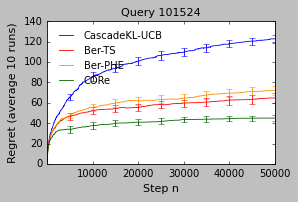

Simulation with 5 positions and 10 items
.......... 16.3 seconds
Regret: 118.30 +/- 10.82 (median: 121.50, max: 186.00, min: 73.00)
Simulation with 5 positions and 10 items
.......... 6.7 seconds
Regret: 74.00 +/- 5.63 (median: 72.50, max: 121.00, min: 55.00)
Simulation with 5 positions and 10 items
.......... 7.4 seconds
Regret: 69.00 +/- 5.67 (median: 65.00, max: 103.00, min: 48.00)
Simulation with 5 positions and 10 items
.......... 435.4 seconds
Regret: 86.60 +/- 11.39 (median: 76.00, max: 157.00, min: 51.00)


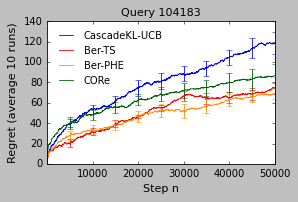

Simulation with 5 positions and 10 items
.......... 15.7 seconds
Regret: 130.30 +/- 3.08 (median: 129.50, max: 147.00, min: 116.00)
Simulation with 5 positions and 10 items
.......... 6.1 seconds
Regret: 54.50 +/- 2.18 (median: 56.00, max: 64.00, min: 41.00)
Simulation with 5 positions and 10 items
.......... 7.2 seconds
Regret: 95.30 +/- 3.94 (median: 96.00, max: 111.00, min: 71.00)
Simulation with 5 positions and 10 items
.......... 719.9 seconds
Regret: 58.90 +/- 4.46 (median: 57.00, max: 91.00, min: 42.00)


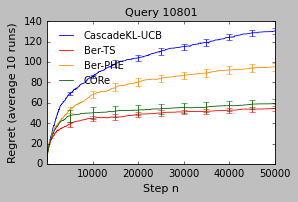

Simulation with 5 positions and 10 items
.......... 14.1 seconds
Regret: 83.80 +/- 4.87 (median: 84.00, max: 106.00, min: 53.00)
Simulation with 5 positions and 10 items
.......... 5.6 seconds
Regret: 48.40 +/- 5.82 (median: 50.00, max: 77.00, min: 10.00)
Simulation with 5 positions and 10 items
.......... 6.9 seconds
Regret: 95.40 +/- 6.66 (median: 100.50, max: 128.00, min: 66.00)
Simulation with 5 positions and 10 items
.......... 409.5 seconds
Regret: 93.20 +/- 6.01 (median: 92.50, max: 119.00, min: 69.00)


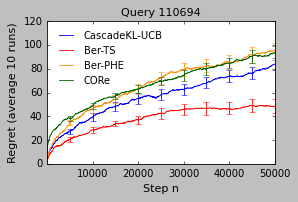

Simulation with 5 positions and 10 items
.......... 15.2 seconds
Regret: 168.20 +/- 6.88 (median: 166.00, max: 208.00, min: 143.00)
Simulation with 5 positions and 10 items
.......... 5.5 seconds
Regret: 81.50 +/- 9.27 (median: 71.00, max: 154.00, min: 53.00)
Simulation with 5 positions and 10 items
.......... 6.7 seconds
Regret: 112.80 +/- 8.52 (median: 106.00, max: 170.00, min: 73.00)
Simulation with 5 positions and 10 items
.......... 497.0 seconds
Regret: 114.70 +/- 21.85 (median: 84.50, max: 251.00, min: 47.00)


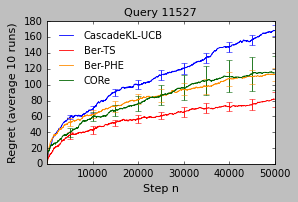

Simulation with 5 positions and 10 items
.......... 14.5 seconds
Regret: 150.50 +/- 15.98 (median: 165.00, max: 211.00, min: 62.00)
Simulation with 5 positions and 10 items
.......... 5.5 seconds
Regret: 79.50 +/- 10.10 (median: 72.00, max: 144.00, min: 40.00)
Simulation with 5 positions and 10 items
.......... 6.6 seconds
Regret: 118.70 +/- 10.05 (median: 126.00, max: 162.00, min: 41.00)
Simulation with 5 positions and 10 items
.......... 590.9 seconds
Regret: 117.40 +/- 11.11 (median: 113.50, max: 190.00, min: 62.00)


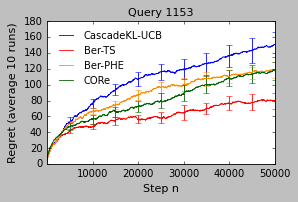

Simulation with 5 positions and 10 items
.......... 15.6 seconds
Regret: 152.10 +/- 12.16 (median: 141.00, max: 226.00, min: 110.00)
Simulation with 5 positions and 10 items
.......... 5.6 seconds
Regret: 68.20 +/- 6.92 (median: 63.50, max: 117.00, min: 43.00)
Simulation with 5 positions and 10 items
.......... 6.7 seconds
Regret: 82.90 +/- 17.88 (median: 69.00, max: 212.00, min: 1.00)
Simulation with 5 positions and 10 items
.......... 613.0 seconds
Regret: 87.50 +/- 17.26 (median: 77.50, max: 192.00, min: 8.00)


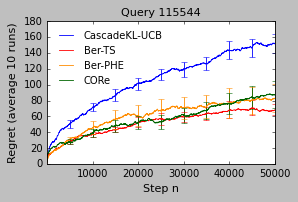

Simulation with 5 positions and 10 items
.......... 13.6 seconds
Regret: 107.90 +/- 5.68 (median: 99.50, max: 152.00, min: 90.00)
Simulation with 5 positions and 10 items
.......... 5.6 seconds
Regret: 61.00 +/- 6.48 (median: 58.00, max: 108.00, min: 37.00)
Simulation with 5 positions and 10 items
.......... 6.7 seconds
Regret: 146.70 +/- 7.35 (median: 149.50, max: 180.00, min: 98.00)
Simulation with 5 positions and 10 items
.......... 554.2 seconds
Regret: 122.60 +/- 5.31 (median: 123.50, max: 146.00, min: 87.00)


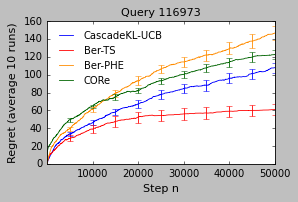

Simulation with 5 positions and 10 items
.......... 13.9 seconds
Regret: 95.80 +/- 3.97 (median: 93.00, max: 121.00, min: 71.00)
Simulation with 5 positions and 10 items
.......... 5.2 seconds
Regret: 52.70 +/- 4.07 (median: 53.00, max: 78.00, min: 33.00)
Simulation with 5 positions and 10 items
.......... 6.5 seconds
Regret: 128.40 +/- 4.97 (median: 127.00, max: 156.00, min: 106.00)
Simulation with 5 positions and 10 items
.......... 668.5 seconds
Regret: 97.90 +/- 6.21 (median: 97.00, max: 130.00, min: 57.00)


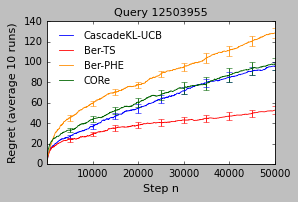

Simulation with 5 positions and 10 items
.......... 14.1 seconds
Regret: 168.20 +/- 9.23 (median: 166.00, max: 226.00, min: 120.00)
Simulation with 5 positions and 10 items
.......... 5.7 seconds
Regret: 73.70 +/- 6.30 (median: 65.50, max: 118.00, min: 57.00)
Simulation with 5 positions and 10 items
.......... 6.4 seconds
Regret: 206.40 +/- 10.65 (median: 202.00, max: 280.00, min: 163.00)
Simulation with 5 positions and 10 items
.......... 900.6 seconds
Regret: 91.50 +/- 7.17 (median: 86.50, max: 141.00, min: 64.00)


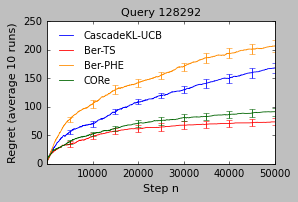

Simulation with 5 positions and 10 items
.......... 13.8 seconds
Regret: 162.50 +/- 5.19 (median: 164.00, max: 197.00, min: 139.00)
Simulation with 5 positions and 10 items
.......... 5.4 seconds
Regret: 68.80 +/- 11.59 (median: 59.00, max: 176.00, min: 44.00)
Simulation with 5 positions and 10 items
.......... 6.5 seconds
Regret: 171.00 +/- 5.28 (median: 168.00, max: 215.00, min: 148.00)
Simulation with 5 positions and 10 items
.......... 637.1 seconds
Regret: 90.50 +/- 5.35 (median: 89.00, max: 119.00, min: 64.00)


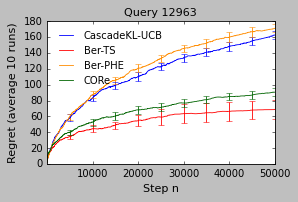

Simulation with 5 positions and 10 items
.......... 13.2 seconds
Regret: 44.70 +/- 2.98 (median: 48.50, max: 54.00, min: 26.00)
Simulation with 5 positions and 10 items
.......... 5.8 seconds
Regret: 33.00 +/- 2.20 (median: 30.50, max: 52.00, min: 27.00)
Simulation with 5 positions and 10 items
.......... 6.9 seconds
Regret: 54.00 +/- 2.47 (median: 51.50, max: 69.00, min: 44.00)
Simulation with 5 positions and 10 items
.......... 284.3 seconds
Regret: 57.50 +/- 2.41 (median: 56.50, max: 70.00, min: 46.00)


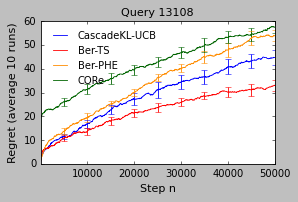

Simulation with 5 positions and 10 items
.......... 14.8 seconds
Regret: 118.50 +/- 9.14 (median: 111.00, max: 174.00, min: 71.00)
Simulation with 5 positions and 10 items
.......... 5.5 seconds
Regret: 66.60 +/- 3.82 (median: 65.50, max: 90.00, min: 48.00)
Simulation with 5 positions and 10 items
.......... 6.7 seconds
Regret: 128.10 +/- 7.00 (median: 127.00, max: 169.00, min: 95.00)
Simulation with 5 positions and 10 items
.......... 585.7 seconds
Regret: 99.00 +/- 4.61 (median: 94.50, max: 126.00, min: 83.00)


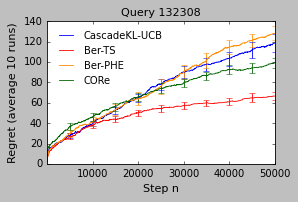

Simulation with 5 positions and 10 items
.......... 14.8 seconds
Regret: 104.30 +/- 3.06 (median: 104.50, max: 118.00, min: 89.00)
Simulation with 5 positions and 10 items
.......... 5.5 seconds
Regret: 43.20 +/- 3.38 (median: 41.50, max: 70.00, min: 32.00)
Simulation with 5 positions and 10 items
.......... 6.9 seconds
Regret: 68.20 +/- 2.59 (median: 69.00, max: 81.00, min: 51.00)
Simulation with 5 positions and 10 items
.......... 440.0 seconds
Regret: 58.30 +/- 3.63 (median: 56.00, max: 80.00, min: 44.00)


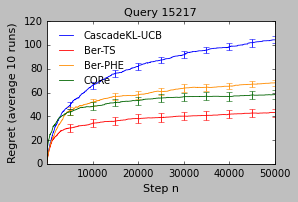

Simulation with 5 positions and 10 items
.......... 14.4 seconds
Regret: 171.60 +/- 6.43 (median: 172.00, max: 217.00, min: 135.00)
Simulation with 5 positions and 10 items
.......... 5.5 seconds
Regret: 74.50 +/- 4.36 (median: 73.00, max: 101.00, min: 50.00)
Simulation with 5 positions and 10 items
.......... 6.8 seconds
Regret: 99.40 +/- 4.52 (median: 98.00, max: 128.00, min: 78.00)
Simulation with 5 positions and 10 items
.......... 595.6 seconds
Regret: 75.60 +/- 13.37 (median: 59.50, max: 197.00, min: 49.00)


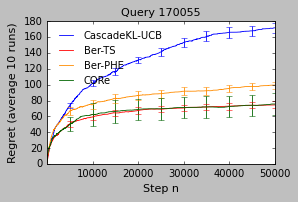

Simulation with 5 positions and 10 items
.......... 15.3 seconds
Regret: 120.90 +/- 4.33 (median: 116.50, max: 143.00, min: 99.00)
Simulation with 5 positions and 10 items
.......... 5.6 seconds
Regret: 46.60 +/- 2.49 (median: 46.00, max: 62.00, min: 35.00)
Simulation with 5 positions and 10 items
.......... 6.9 seconds
Regret: 61.60 +/- 2.60 (median: 62.00, max: 77.00, min: 50.00)
Simulation with 5 positions and 10 items
.......... 499.3 seconds
Regret: 43.90 +/- 2.20 (median: 43.50, max: 54.00, min: 33.00)


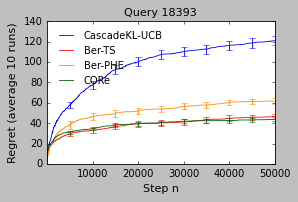

Simulation with 5 positions and 10 items
.......... 15.1 seconds
Regret: 144.40 +/- 6.70 (median: 140.50, max: 182.00, min: 120.00)
Simulation with 5 positions and 10 items
.......... 5.6 seconds
Regret: 58.00 +/- 3.39 (median: 59.00, max: 78.00, min: 43.00)
Simulation with 5 positions and 10 items
.......... 6.9 seconds
Regret: 70.60 +/- 6.64 (median: 66.50, max: 126.00, min: 49.00)
Simulation with 5 positions and 10 items
.......... 446.5 seconds
Regret: 62.30 +/- 2.70 (median: 60.00, max: 77.00, min: 47.00)


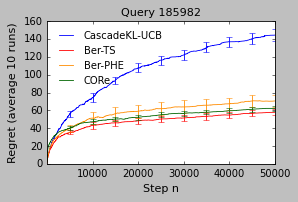

Simulation with 5 positions and 10 items
.......... 15.2 seconds
Regret: 161.80 +/- 8.93 (median: 154.50, max: 215.00, min: 128.00)
Simulation with 5 positions and 10 items
.......... 5.6 seconds
Regret: 76.90 +/- 6.33 (median: 79.00, max: 108.00, min: 44.00)
Simulation with 5 positions and 10 items
.......... 6.8 seconds
Regret: 94.10 +/- 3.43 (median: 96.00, max: 111.00, min: 72.00)
Simulation with 5 positions and 10 items
.......... 479.8 seconds
Regret: 76.60 +/- 5.93 (median: 73.00, max: 112.00, min: 50.00)


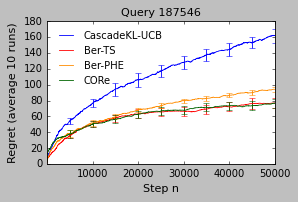

Simulation with 5 positions and 10 items
.......... 14.3 seconds
Regret: 219.20 +/- 10.02 (median: 213.00, max: 290.00, min: 182.00)
Simulation with 5 positions and 10 items
.......... 5.5 seconds
Regret: 79.40 +/- 5.36 (median: 76.50, max: 106.00, min: 56.00)
Simulation with 5 positions and 10 items
.......... 6.7 seconds
Regret: 127.60 +/- 6.29 (median: 121.00, max: 175.00, min: 104.00)
Simulation with 5 positions and 10 items
.......... 689.3 seconds
Regret: 78.00 +/- 5.65 (median: 71.50, max: 115.00, min: 57.00)


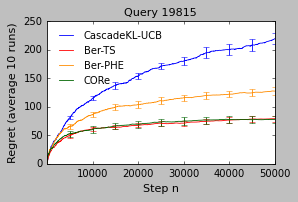

Simulation with 5 positions and 10 items
.......... 13.2 seconds
Regret: 142.70 +/- 4.70 (median: 143.50, max: 165.00, min: 107.00)
Simulation with 5 positions and 10 items
.......... 5.4 seconds
Regret: 56.70 +/- 3.82 (median: 60.00, max: 71.00, min: 32.00)
Simulation with 5 positions and 10 items
.......... 6.3 seconds
Regret: 190.80 +/- 7.39 (median: 186.50, max: 241.00, min: 167.00)
Simulation with 5 positions and 10 items
.......... 849.4 seconds
Regret: 75.90 +/- 6.13 (median: 69.50, max: 120.00, min: 54.00)


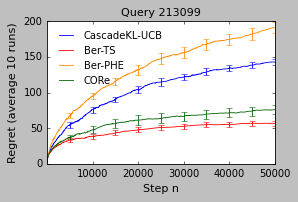

Simulation with 5 positions and 10 items
.......... 16.0 seconds
Regret: 206.70 +/- 11.62 (median: 205.50, max: 278.00, min: 135.00)
Simulation with 5 positions and 10 items
.......... 5.4 seconds
Regret: 124.30 +/- 20.82 (median: 106.00, max: 276.00, min: 42.00)
Simulation with 5 positions and 10 items
.......... 6.7 seconds
Regret: 130.30 +/- 13.55 (median: 130.00, max: 198.00, min: 69.00)
Simulation with 5 positions and 10 items
.......... 588.0 seconds
Regret: 138.50 +/- 17.13 (median: 132.50, max: 243.00, min: 51.00)


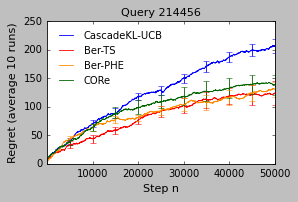

Simulation with 5 positions and 10 items
.......... 15.6 seconds
Regret: 157.90 +/- 4.87 (median: 160.50, max: 184.00, min: 131.00)
Simulation with 5 positions and 10 items
.......... 5.6 seconds
Regret: 103.70 +/- 14.53 (median: 82.50, max: 190.00, min: 52.00)
Simulation with 5 positions and 10 items
.......... 6.9 seconds
Regret: 95.20 +/- 16.18 (median: 80.50, max: 199.00, min: 39.00)
Simulation with 5 positions and 10 items
.......... 475.9 seconds
Regret: 95.40 +/- 20.19 (median: 71.00, max: 229.00, min: 23.00)


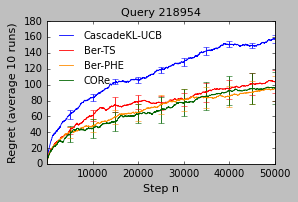

Simulation with 5 positions and 10 items
.......... 15.1 seconds
Regret: 126.50 +/- 3.60 (median: 124.50, max: 150.00, min: 110.00)
Simulation with 5 positions and 10 items
.......... 5.6 seconds
Regret: 54.10 +/- 3.46 (median: 54.00, max: 70.00, min: 38.00)
Simulation with 5 positions and 10 items
.......... 6.8 seconds
Regret: 76.40 +/- 5.24 (median: 76.00, max: 96.00, min: 47.00)
Simulation with 5 positions and 10 items
.......... 414.0 seconds
Regret: 66.60 +/- 3.21 (median: 67.00, max: 88.00, min: 47.00)


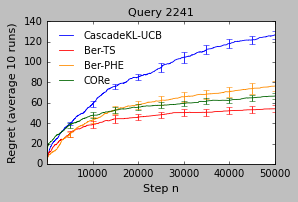

Simulation with 5 positions and 10 items
.......... 15.0 seconds
Regret: 121.90 +/- 5.95 (median: 123.50, max: 153.00, min: 88.00)
Simulation with 5 positions and 10 items
.......... 5.5 seconds
Regret: 65.90 +/- 7.51 (median: 62.50, max: 122.00, min: 35.00)
Simulation with 5 positions and 10 items
.......... 6.8 seconds
Regret: 82.20 +/- 6.91 (median: 85.50, max: 116.00, min: 44.00)
Simulation with 5 positions and 10 items
.......... 442.0 seconds
Regret: 73.00 +/- 5.64 (median: 77.00, max: 96.00, min: 38.00)


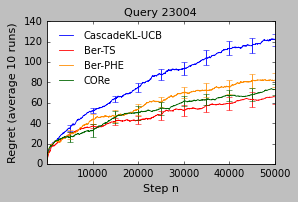

Simulation with 5 positions and 10 items
.......... 14.6 seconds
Regret: 113.80 +/- 10.28 (median: 111.50, max: 190.00, min: 59.00)
Simulation with 5 positions and 10 items
.......... 5.5 seconds
Regret: 72.90 +/- 11.00 (median: 73.00, max: 147.00, min: 25.00)
Simulation with 5 positions and 10 items
.......... 6.6 seconds
Regret: 93.40 +/- 11.44 (median: 89.00, max: 168.00, min: 33.00)
Simulation with 5 positions and 10 items
.......... 482.4 seconds
Regret: 80.00 +/- 7.91 (median: 80.00, max: 123.00, min: 41.00)


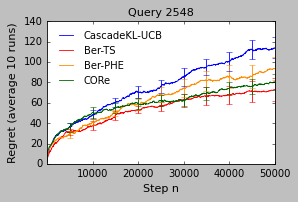

Simulation with 5 positions and 10 items
.......... 15.1 seconds
Regret: 148.50 +/- 6.21 (median: 143.00, max: 191.00, min: 117.00)
Simulation with 5 positions and 10 items
.......... 5.6 seconds
Regret: 67.60 +/- 3.85 (median: 68.50, max: 87.00, min: 50.00)
Simulation with 5 positions and 10 items
.......... 6.6 seconds
Regret: 93.90 +/- 4.75 (median: 89.50, max: 119.00, min: 66.00)
Simulation with 5 positions and 10 items
.......... 496.7 seconds
Regret: 74.80 +/- 3.24 (median: 72.00, max: 93.00, min: 60.00)


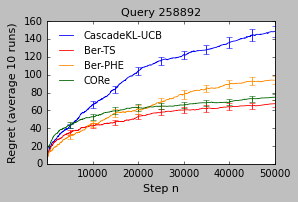

Simulation with 5 positions and 10 items
.......... 15.6 seconds
Regret: 133.00 +/- 8.29 (median: 139.50, max: 166.00, min: 73.00)
Simulation with 5 positions and 10 items
.......... 5.6 seconds
Regret: 89.10 +/- 7.64 (median: 82.00, max: 127.00, min: 55.00)
Simulation with 5 positions and 10 items
.......... 6.8 seconds
Regret: 106.90 +/- 5.56 (median: 108.00, max: 134.00, min: 67.00)
Simulation with 5 positions and 10 items
.......... 521.8 seconds
Regret: 73.70 +/- 6.63 (median: 71.00, max: 127.00, min: 51.00)


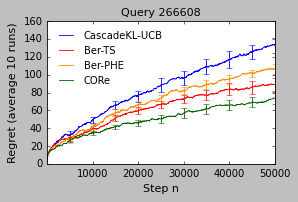

Simulation with 5 positions and 10 items
.......... 12.5 seconds
Regret: 91.40 +/- 5.05 (median: 92.00, max: 120.00, min: 65.00)
Simulation with 5 positions and 10 items
.......... 5.0 seconds
Regret: 43.10 +/- 8.54 (median: 41.00, max: 110.00, min: 8.00)
Simulation with 5 positions and 10 items
.......... 6.1 seconds
Regret: 168.00 +/- 5.72 (median: 162.50, max: 196.00, min: 140.00)
Simulation with 5 positions and 10 items
.......... 993.8 seconds
Regret: 58.10 +/- 5.99 (median: 53.00, max: 90.00, min: 34.00)


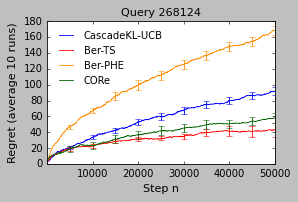

Simulation with 5 positions and 10 items
.......... 14.3 seconds
Regret: 167.80 +/- 5.25 (median: 173.00, max: 189.00, min: 144.00)
Simulation with 5 positions and 10 items
.......... 5.5 seconds
Regret: 75.80 +/- 3.63 (median: 77.00, max: 93.00, min: 53.00)
Simulation with 5 positions and 10 items
.......... 6.5 seconds
Regret: 144.80 +/- 5.72 (median: 147.50, max: 176.00, min: 117.00)
Simulation with 5 positions and 10 items
.......... 614.7 seconds
Regret: 85.30 +/- 4.87 (median: 83.50, max: 117.00, min: 61.00)


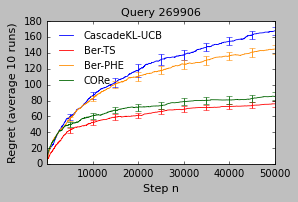

Simulation with 5 positions and 10 items
.......... 15.1 seconds
Regret: 170.80 +/- 7.73 (median: 161.50, max: 208.00, min: 136.00)
Simulation with 5 positions and 10 items
.......... 5.5 seconds
Regret: 68.10 +/- 6.55 (median: 62.50, max: 122.00, min: 50.00)
Simulation with 5 positions and 10 items
.......... 6.7 seconds
Regret: 90.20 +/- 3.68 (median: 86.50, max: 106.00, min: 69.00)
Simulation with 5 positions and 10 items
.......... 490.5 seconds
Regret: 63.90 +/- 4.30 (median: 67.50, max: 84.00, min: 36.00)


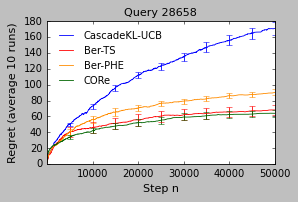

Simulation with 5 positions and 10 items
.......... 13.6 seconds
Regret: 167.40 +/- 4.52 (median: 161.50, max: 193.00, min: 150.00)
Simulation with 5 positions and 10 items
.......... 5.2 seconds
Regret: 68.70 +/- 4.83 (median: 67.50, max: 101.00, min: 47.00)
Simulation with 5 positions and 10 items
.......... 6.4 seconds
Regret: 187.30 +/- 10.15 (median: 178.00, max: 263.00, min: 153.00)
Simulation with 5 positions and 10 items
.......... 836.3 seconds
Regret: 65.70 +/- 5.55 (median: 64.50, max: 98.00, min: 42.00)


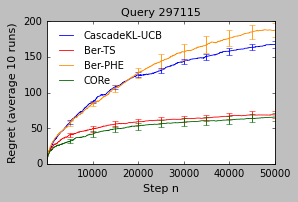

Simulation with 5 positions and 10 items
.......... 15.3 seconds
Regret: 165.70 +/- 10.60 (median: 170.50, max: 209.00, min: 99.00)
Simulation with 5 positions and 10 items
.......... 5.5 seconds
Regret: 69.80 +/- 5.57 (median: 74.00, max: 108.00, min: 46.00)
Simulation with 5 positions and 10 items
.......... 6.7 seconds
Regret: 97.90 +/- 7.20 (median: 96.50, max: 134.00, min: 61.00)
Simulation with 5 positions and 10 items
.......... 488.7 seconds
Regret: 72.30 +/- 5.82 (median: 71.00, max: 116.00, min: 52.00)


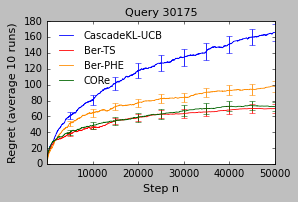

Simulation with 5 positions and 10 items
.......... 13.9 seconds
Regret: 124.50 +/- 3.14 (median: 121.50, max: 140.00, min: 108.00)
Simulation with 5 positions and 10 items
.......... 5.4 seconds
Regret: 46.50 +/- 2.11 (median: 43.50, max: 57.00, min: 39.00)
Simulation with 5 positions and 10 items
.......... 6.7 seconds
Regret: 108.10 +/- 4.40 (median: 108.50, max: 131.00, min: 88.00)
Simulation with 5 positions and 10 items
.......... 524.6 seconds
Regret: 86.80 +/- 3.62 (median: 86.00, max: 112.00, min: 72.00)


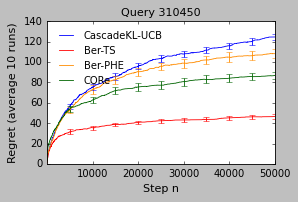

Simulation with 5 positions and 10 items
.......... 16.4 seconds
Regret: 160.10 +/- 6.27 (median: 165.00, max: 181.00, min: 107.00)
Simulation with 5 positions and 10 items
.......... 6.6 seconds
Regret: 73.40 +/- 6.07 (median: 76.50, max: 115.00, min: 38.00)
Simulation with 5 positions and 10 items
.......... 7.6 seconds
Regret: 101.50 +/- 6.42 (median: 103.00, max: 135.00, min: 68.00)
Simulation with 5 positions and 10 items
.......... 457.7 seconds
Regret: 85.60 +/- 6.23 (median: 85.00, max: 122.00, min: 61.00)


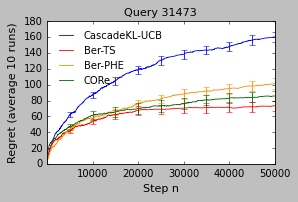

Simulation with 5 positions and 10 items
.......... 13.8 seconds
Regret: 138.50 +/- 5.03 (median: 137.00, max: 163.00, min: 108.00)
Simulation with 5 positions and 10 items
.......... 5.3 seconds
Regret: 63.60 +/- 2.50 (median: 63.50, max: 78.00, min: 52.00)
Simulation with 5 positions and 10 items
.......... 6.5 seconds
Regret: 99.60 +/- 1.73 (median: 99.00, max: 111.00, min: 92.00)
Simulation with 5 positions and 10 items
.......... 720.0 seconds
Regret: 53.30 +/- 3.10 (median: 56.50, max: 69.00, min: 37.00)


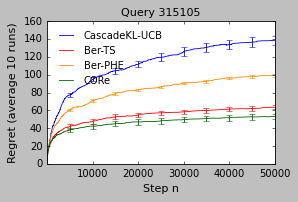

Simulation with 5 positions and 10 items
.......... 15.5 seconds
Regret: 164.10 +/- 6.78 (median: 163.00, max: 202.00, min: 132.00)
Simulation with 5 positions and 10 items
.......... 5.7 seconds
Regret: 91.80 +/- 8.56 (median: 84.50, max: 136.00, min: 54.00)
Simulation with 5 positions and 10 items
.......... 7.0 seconds
Regret: 111.00 +/- 20.74 (median: 86.50, max: 299.00, min: 65.00)
Simulation with 5 positions and 10 items
.......... 560.1 seconds
Regret: 87.60 +/- 10.51 (median: 75.50, max: 172.00, min: 54.00)


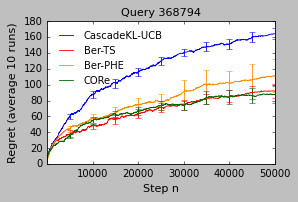

Simulation with 5 positions and 10 items
.......... 14.2 seconds
Regret: 101.00 +/- 4.79 (median: 98.00, max: 137.00, min: 77.00)
Simulation with 5 positions and 10 items
.......... 5.8 seconds
Regret: 59.10 +/- 4.29 (median: 57.50, max: 85.00, min: 41.00)
Simulation with 5 positions and 10 items
.......... 6.9 seconds
Regret: 101.30 +/- 10.59 (median: 95.50, max: 166.00, min: 39.00)
Simulation with 5 positions and 10 items
.......... 372.0 seconds
Regret: 93.20 +/- 6.11 (median: 89.50, max: 132.00, min: 73.00)


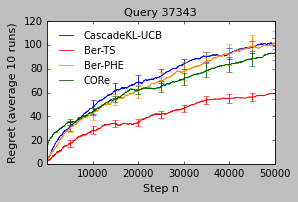

Simulation with 5 positions and 10 items
.......... 13.9 seconds
Regret: 179.30 +/- 8.78 (median: 176.00, max: 224.00, min: 131.00)
Simulation with 5 positions and 10 items
.......... 5.3 seconds
Regret: 71.60 +/- 4.72 (median: 74.50, max: 96.00, min: 50.00)
Simulation with 5 positions and 10 items
.......... 6.5 seconds
Regret: 146.70 +/- 8.26 (median: 141.50, max: 196.00, min: 94.00)
Simulation with 5 positions and 10 items
.......... 797.6 seconds
Regret: 72.10 +/- 3.61 (median: 75.00, max: 90.00, min: 48.00)


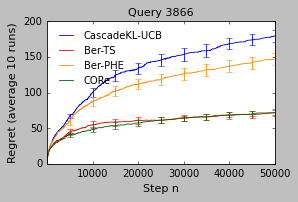

Simulation with 5 positions and 10 items
.......... 15.1 seconds
Regret: 177.70 +/- 11.54 (median: 162.00, max: 245.00, min: 128.00)
Simulation with 5 positions and 10 items
.......... 5.5 seconds
Regret: 79.40 +/- 11.70 (median: 80.50, max: 136.00, min: 3.00)
Simulation with 5 positions and 10 items
.......... 6.7 seconds
Regret: 120.00 +/- 20.15 (median: 120.00, max: 199.00, min: -31.00)
Simulation with 5 positions and 10 items
.......... 652.4 seconds
Regret: 99.00 +/- 12.84 (median: 88.00, max: 180.00, min: 23.00)


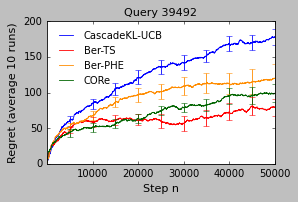

Simulation with 5 positions and 10 items
.......... 13.1 seconds
Regret: 160.30 +/- 9.24 (median: 153.50, max: 233.00, min: 132.00)
Simulation with 5 positions and 10 items
.......... 5.1 seconds
Regret: 102.30 +/- 14.82 (median: 91.00, max: 221.00, min: 53.00)
Simulation with 5 positions and 10 items
.......... 6.2 seconds
Regret: 204.50 +/- 12.99 (median: 205.00, max: 268.00, min: 142.00)
Simulation with 5 positions and 10 items
.......... 935.9 seconds
Regret: 77.80 +/- 7.80 (median: 71.50, max: 118.00, min: 46.00)


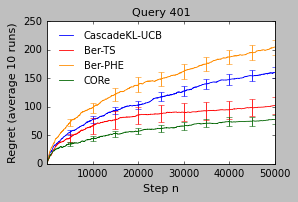

Simulation with 5 positions and 10 items
.......... 13.9 seconds
Regret: 123.90 +/- 5.82 (median: 124.00, max: 145.00, min: 97.00)
Simulation with 5 positions and 10 items
.......... 5.5 seconds
Regret: 56.40 +/- 4.74 (median: 52.50, max: 92.00, min: 40.00)
Simulation with 5 positions and 10 items
.......... 6.6 seconds
Regret: 124.70 +/- 6.24 (median: 119.50, max: 163.00, min: 103.00)
Simulation with 5 positions and 10 items
.......... 490.7 seconds
Regret: 111.80 +/- 6.93 (median: 116.00, max: 145.00, min: 70.00)


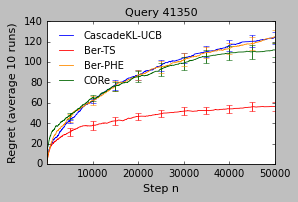

Simulation with 5 positions and 10 items
.......... 14.0 seconds
Regret: 86.90 +/- 4.44 (median: 85.00, max: 111.00, min: 65.00)
Simulation with 5 positions and 10 items
.......... 5.5 seconds
Regret: 60.30 +/- 8.69 (median: 59.50, max: 125.00, min: 20.00)
Simulation with 5 positions and 10 items
.......... 6.6 seconds
Regret: 123.10 +/- 7.38 (median: 127.50, max: 155.00, min: 86.00)
Simulation with 5 positions and 10 items
.......... 538.4 seconds
Regret: 104.10 +/- 5.79 (median: 98.50, max: 143.00, min: 82.00)


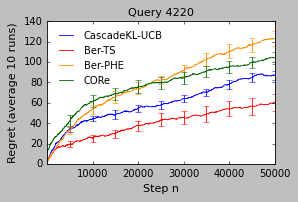

Simulation with 5 positions and 10 items
.......... 13.0 seconds
Regret: 159.40 +/- 7.30 (median: 163.50, max: 203.00, min: 121.00)
Simulation with 5 positions and 10 items
.......... 5.1 seconds
Regret: 72.50 +/- 7.85 (median: 64.00, max: 141.00, min: 51.00)
Simulation with 5 positions and 10 items
.......... 6.2 seconds
Regret: 176.70 +/- 8.03 (median: 171.50, max: 227.00, min: 148.00)
Simulation with 5 positions and 10 items
.......... 962.2 seconds
Regret: 60.50 +/- 6.97 (median: 50.00, max: 114.00, min: 41.00)


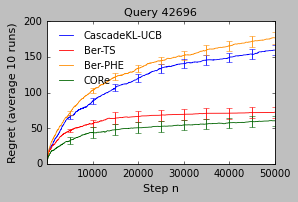

Simulation with 5 positions and 10 items
.......... 14.6 seconds
Regret: 135.70 +/- 7.83 (median: 147.00, max: 174.00, min: 102.00)
Simulation with 5 positions and 10 items
.......... 5.5 seconds
Regret: 59.90 +/- 4.46 (median: 63.50, max: 78.00, min: 37.00)
Simulation with 5 positions and 10 items
.......... 6.7 seconds
Regret: 110.50 +/- 6.72 (median: 118.50, max: 143.00, min: 79.00)
Simulation with 5 positions and 10 items
.......... 506.3 seconds
Regret: 82.70 +/- 7.59 (median: 80.00, max: 116.00, min: 43.00)


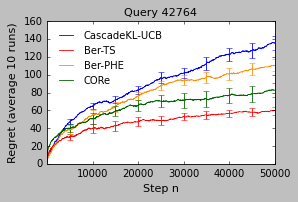

Simulation with 5 positions and 10 items
.......... 15.9 seconds
Regret: 142.20 +/- 8.30 (median: 137.50, max: 186.00, min: 96.00)
Simulation with 5 positions and 10 items
.......... 5.7 seconds
Regret: 56.70 +/- 2.65 (median: 58.50, max: 67.00, min: 42.00)
Simulation with 5 positions and 10 items
.......... 6.9 seconds
Regret: 55.20 +/- 4.07 (median: 58.00, max: 72.00, min: 33.00)
Simulation with 5 positions and 10 items
.......... 458.6 seconds
Regret: 40.90 +/- 2.79 (median: 41.00, max: 62.00, min: 27.00)


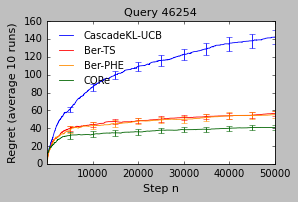

Simulation with 5 positions and 10 items
.......... 15.0 seconds
Regret: 128.60 +/- 6.72 (median: 140.00, max: 149.00, min: 87.00)
Simulation with 5 positions and 10 items
.......... 5.7 seconds
Regret: 64.20 +/- 6.13 (median: 58.00, max: 104.00, min: 36.00)
Simulation with 5 positions and 10 items
.......... 6.8 seconds
Regret: 52.00 +/- 3.06 (median: 51.50, max: 73.00, min: 38.00)
Simulation with 5 positions and 10 items
.......... 373.5 seconds
Regret: 60.70 +/- 4.80 (median: 60.50, max: 88.00, min: 33.00)


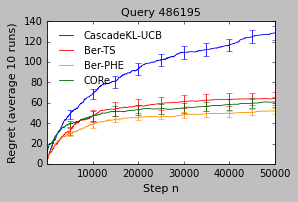

Simulation with 5 positions and 10 items
.......... 14.9 seconds
Regret: 166.30 +/- 6.55 (median: 169.50, max: 200.00, min: 119.00)
Simulation with 5 positions and 10 items
.......... 5.6 seconds
Regret: 67.90 +/- 5.29 (median: 68.50, max: 99.00, min: 41.00)
Simulation with 5 positions and 10 items
.......... 6.7 seconds
Regret: 102.50 +/- 7.89 (median: 105.50, max: 129.00, min: 38.00)
Simulation with 5 positions and 10 items
.......... 563.6 seconds
Regret: 101.10 +/- 9.44 (median: 97.50, max: 178.00, min: 64.00)


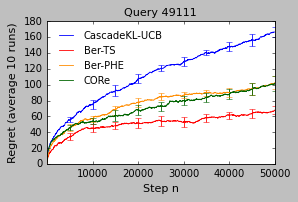

Simulation with 5 positions and 10 items
.......... 13.8 seconds
Regret: 54.70 +/- 2.03 (median: 56.00, max: 66.00, min: 40.00)
Simulation with 5 positions and 10 items
.......... 5.7 seconds
Regret: 36.80 +/- 2.78 (median: 41.00, max: 47.00, min: 22.00)
Simulation with 5 positions and 10 items
.......... 7.0 seconds
Regret: 48.10 +/- 4.31 (median: 47.50, max: 72.00, min: 27.00)
Simulation with 5 positions and 10 items
.......... 287.0 seconds
Regret: 51.00 +/- 2.48 (median: 53.50, max: 59.00, min: 35.00)


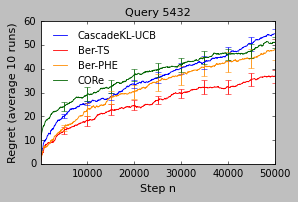

Simulation with 5 positions and 10 items
.......... 14.0 seconds
Regret: 140.50 +/- 7.82 (median: 141.50, max: 182.00, min: 93.00)
Simulation with 5 positions and 10 items
.......... 5.3 seconds
Regret: 78.00 +/- 7.45 (median: 76.50, max: 116.00, min: 45.00)
Simulation with 5 positions and 10 items
.......... 6.5 seconds
Regret: 163.30 +/- 7.33 (median: 156.50, max: 219.00, min: 131.00)
Simulation with 5 positions and 10 items
.......... 843.2 seconds
Regret: 98.50 +/- 5.01 (median: 99.50, max: 123.00, min: 62.00)


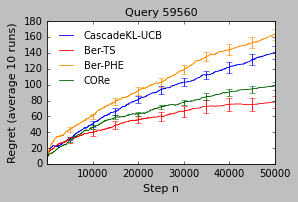

Simulation with 5 positions and 10 items
.......... 14.6 seconds
Regret: 128.60 +/- 7.37 (median: 119.50, max: 171.00, min: 102.00)
Simulation with 5 positions and 10 items
.......... 5.5 seconds
Regret: 64.00 +/- 5.17 (median: 64.00, max: 91.00, min: 35.00)
Simulation with 5 positions and 10 items
.......... 6.9 seconds
Regret: 66.90 +/- 7.86 (median: 62.00, max: 116.00, min: 23.00)
Simulation with 5 positions and 10 items
.......... 336.2 seconds
Regret: 58.00 +/- 4.19 (median: 56.50, max: 78.00, min: 29.00)


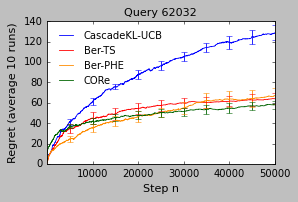

Simulation with 5 positions and 10 items
.......... 14.2 seconds
Regret: 127.80 +/- 5.11 (median: 129.50, max: 154.00, min: 104.00)
Simulation with 5 positions and 10 items
.......... 5.5 seconds
Regret: 45.80 +/- 2.74 (median: 44.50, max: 61.00, min: 33.00)
Simulation with 5 positions and 10 items
.......... 6.5 seconds
Regret: 96.60 +/- 3.65 (median: 93.50, max: 118.00, min: 80.00)
Simulation with 5 positions and 10 items
.......... 700.8 seconds
Regret: 54.50 +/- 3.03 (median: 56.50, max: 69.00, min: 39.00)


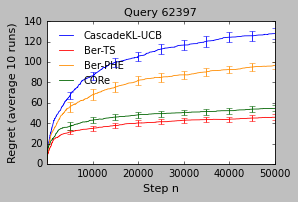

Simulation with 5 positions and 10 items
.......... 14.6 seconds
Regret: 202.80 +/- 12.82 (median: 204.50, max: 266.00, min: 122.00)
Simulation with 5 positions and 10 items
.......... 5.4 seconds
Regret: 118.10 +/- 5.32 (median: 118.00, max: 143.00, min: 94.00)
Simulation with 5 positions and 10 items
.......... 6.6 seconds
Regret: 151.70 +/- 15.42 (median: 134.50, max: 273.00, min: 94.00)
Simulation with 5 positions and 10 items
.......... 727.0 seconds
Regret: 100.20 +/- 12.34 (median: 83.00, max: 168.00, min: 43.00)


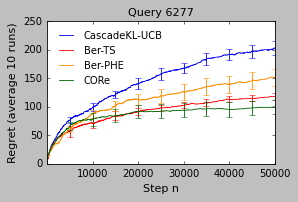

Simulation with 5 positions and 10 items
.......... 14.7 seconds
Regret: 152.80 +/- 4.38 (median: 151.00, max: 176.00, min: 124.00)
Simulation with 5 positions and 10 items
.......... 5.5 seconds
Regret: 62.50 +/- 4.19 (median: 64.50, max: 86.00, min: 42.00)
Simulation with 5 positions and 10 items
.......... 6.6 seconds
Regret: 100.00 +/- 6.70 (median: 100.50, max: 135.00, min: 70.00)
Simulation with 5 positions and 10 items
.......... 625.3 seconds
Regret: 65.90 +/- 4.19 (median: 66.00, max: 85.00, min: 42.00)


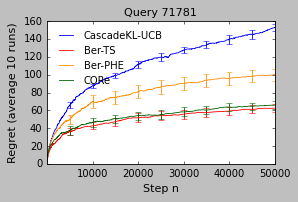

Simulation with 5 positions and 10 items
.......... 15.5 seconds
Regret: 129.60 +/- 6.09 (median: 130.50, max: 162.00, min: 96.00)
Simulation with 5 positions and 10 items
.......... 5.7 seconds
Regret: 49.60 +/- 3.01 (median: 50.00, max: 66.00, min: 37.00)
Simulation with 5 positions and 10 items
.......... 6.7 seconds
Regret: 74.60 +/- 8.22 (median: 76.00, max: 143.00, min: 45.00)
Simulation with 5 positions and 10 items
.......... 426.2 seconds
Regret: 65.70 +/- 4.81 (median: 62.50, max: 104.00, min: 46.00)


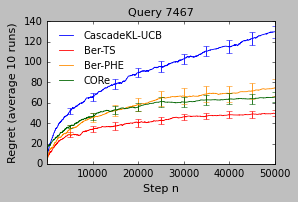

Simulation with 5 positions and 10 items
.......... 13.3 seconds
Regret: 105.50 +/- 6.69 (median: 103.00, max: 143.00, min: 75.00)
Simulation with 5 positions and 10 items
.......... 5.2 seconds
Regret: 57.00 +/- 5.27 (median: 56.50, max: 93.00, min: 28.00)
Simulation with 5 positions and 10 items
.......... 6.3 seconds
Regret: 158.30 +/- 7.93 (median: 162.00, max: 210.00, min: 108.00)
Simulation with 5 positions and 10 items
.......... 833.3 seconds
Regret: 72.50 +/- 6.64 (median: 72.00, max: 108.00, min: 42.00)


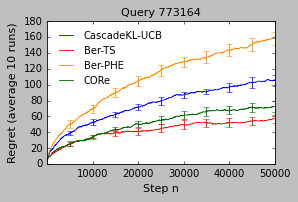

Simulation with 5 positions and 10 items
.......... 14.6 seconds
Regret: 115.10 +/- 5.36 (median: 113.00, max: 145.00, min: 81.00)
Simulation with 5 positions and 10 items
.......... 5.6 seconds
Regret: 54.00 +/- 2.74 (median: 53.50, max: 73.00, min: 43.00)
Simulation with 5 positions and 10 items
.......... 6.8 seconds
Regret: 89.50 +/- 3.47 (median: 91.50, max: 106.00, min: 73.00)
Simulation with 5 positions and 10 items
.......... 460.1 seconds
Regret: 70.80 +/- 5.35 (median: 64.00, max: 106.00, min: 48.00)


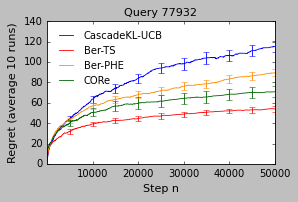

Simulation with 5 positions and 10 items
.......... 14.4 seconds
Regret: 127.00 +/- 5.98 (median: 124.50, max: 160.00, min: 90.00)
Simulation with 5 positions and 10 items
.......... 5.6 seconds
Regret: 53.00 +/- 2.96 (median: 50.00, max: 79.00, min: 44.00)
Simulation with 5 positions and 10 items
.......... 6.6 seconds
Regret: 95.30 +/- 3.07 (median: 95.50, max: 114.00, min: 81.00)
Simulation with 5 positions and 10 items
.......... 482.7 seconds
Regret: 71.70 +/- 3.79 (median: 70.00, max: 100.00, min: 55.00)


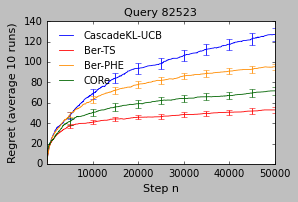

Simulation with 5 positions and 10 items
.......... 13.3 seconds
Regret: 78.00 +/- 3.43 (median: 76.50, max: 92.00, min: 55.00)
Simulation with 5 positions and 10 items
.......... 5.5 seconds
Regret: 42.20 +/- 4.85 (median: 41.50, max: 80.00, min: 26.00)
Simulation with 5 positions and 10 items
.......... 6.7 seconds
Regret: 74.60 +/- 3.75 (median: 73.00, max: 94.00, min: 48.00)
Simulation with 5 positions and 10 items
.......... 271.5 seconds
Regret: 66.10 +/- 3.57 (median: 68.00, max: 85.00, min: 48.00)


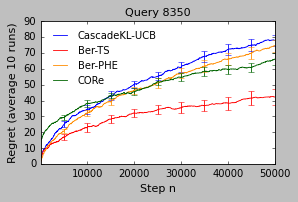

Simulation with 5 positions and 10 items
.......... 13.9 seconds
Regret: 159.80 +/- 10.68 (median: 156.00, max: 221.00, min: 116.00)
Simulation with 5 positions and 10 items
.......... 5.3 seconds
Regret: 96.50 +/- 8.41 (median: 87.50, max: 139.00, min: 55.00)
Simulation with 5 positions and 10 items
.......... 6.3 seconds
Regret: 174.70 +/- 7.22 (median: 176.00, max: 205.00, min: 141.00)
Simulation with 5 positions and 10 items
.......... 716.8 seconds
Regret: 92.70 +/- 6.20 (median: 97.50, max: 130.00, min: 52.00)


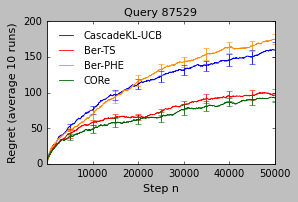

Simulation with 5 positions and 10 items
.......... 15.2 seconds
Regret: 181.00 +/- 7.98 (median: 182.50, max: 220.00, min: 135.00)
Simulation with 5 positions and 10 items
.......... 5.5 seconds
Regret: 78.50 +/- 8.43 (median: 72.00, max: 125.00, min: 41.00)
Simulation with 5 positions and 10 items
.......... 7.0 seconds
Regret: 114.10 +/- 7.47 (median: 112.00, max: 153.00, min: 74.00)
Simulation with 5 positions and 10 items
.......... 598.6 seconds
Regret: 72.70 +/- 8.15 (median: 66.50, max: 132.00, min: 38.00)


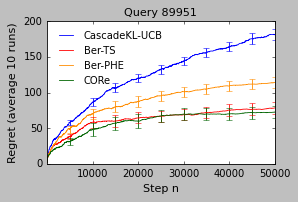

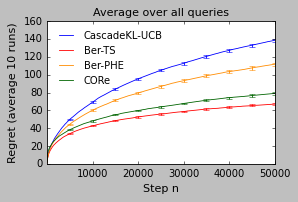

In [3]:
from bandits.l2r_algs import *
from bandits.l2r_simulator import *

# experiments for presentation: evaluation on click models

click_model_dir = "./Click Models"
queries = [\
  "101524", "104183", "10801", "110694", "11527", "1153", "115544", "116973", "12503955", "128292", \
  "12963", "13108", "132308", "15217", "170055", "18393", "185982", "187546", "19815", "213099", \
  "214456", "218954", "2241", "23004", "2548", "258892", "266608", "268124", "269906", "28658", \
  "297115", "30175", "310450", "31473", "315105", "368794", "37343", "3866", "39492", "401", \
  "41350", "4220", "42696", "42764", "46254", "486195", "49111", "5432", "59560", "62032", \
  "62397", "6277", "71781", "7467", "773164", "77932", "82523", "8350", "87529", "89951"]

# queries = ["101524", "104183", "10801", "110694", "11527"]
model = "CM"

T = 50000
num_runs = 10
period_size = 10
num_periods = T // period_size

step = np.arange(period_size, T + 1, period_size)
sube = (step.size // 10) * np.arange(1, 11) - 1

ucb_cumreg = np.zeros((T // period_size, num_runs*len(queries)))
ts_cumreg = np.zeros((T // period_size, num_runs*len(queries)))
phe_cumreg = np.zeros((T // period_size, num_runs*len(queries)))
core_cumreg = np.zeros((T // period_size, num_runs*len(queries)))

for ex in range(len(queries)):
  plt.figure(figsize=(3.8, 2.6))
  query = queries[ex]
  env = globals()[model + "Env"]("%s/%s_%s.txt" % (click_model_dir, query, model))

  '''CascadeKLUCB'''
  (regret, bandit) = evaluate_parallel(CascadeKLUCB, env, num_runs, 
                                       T, period_size, num_process=12)
  cumreg = np.cumsum(regret, axis = 0)
  ucb_cumreg[:, ex*num_runs:(ex+1)*num_runs] = cumreg
  plt.plot(step, np.mean(cumreg, axis = 1), "blue", label = "CascadeKL-UCB")
  plt.errorbar(step[sube], np.mean(cumreg[sube, :], axis = 1), \
    np.std(cumreg[sube, :], axis = 1) / np.sqrt(cumreg.shape[1]), \
    fmt="none", ecolor = "blue")
  
  '''TopRank'''
#   (regret, bandit) = evaluate_parallel(TopRank, env, num_runs, 
#                                         T, period_size, num_process=1)
#   cumreg = np.cumsum(regret, axis = 0)
#   plt.plot(step, np.mean(cumreg, axis = 1), "r", label = "TopRank")
#   plt.errorbar(step[sube], np.mean(cumreg[sube, :], axis = 1), \
#     np.std(cumreg[sube, :], axis = 1) / np.sqrt(cumreg.shape[1]), \
#     fmt = "none", ecolor = "r")
    
  '''TS'''
  (regret, bandit) = evaluate_parallel(TS, env, num_runs, 
                                       T, period_size, num_process=12)
  cumreg = np.cumsum(regret, axis = 0)
  ts_cumreg[:, ex*num_runs:(ex+1)*num_runs] = cumreg
  plt.plot(step, np.mean(cumreg, axis = 1), "red", label = "Ber-TS")
  plt.errorbar(step[sube], np.mean(cumreg[sube, :], axis = 1), \
    np.std(cumreg[sube, :], axis = 1) / np.sqrt(cumreg.shape[1]), \
    fmt="none", ecolor = "red")

  '''PHE'''
  (regret, bandit) = evaluate_parallel(PHE, env, num_runs, 
                                       T, period_size, num_process=12)
  cumreg = np.cumsum(regret, axis = 0)
  phe_cumreg[:, ex*num_runs:(ex+1)*num_runs] = cumreg
  plt.plot(step, np.mean(cumreg, axis = 1), "darkorange", label = "Ber-PHE")
  plt.errorbar(step[sube], np.mean(cumreg[sube, :], axis = 1), \
    np.std(cumreg[sube, :], axis = 1) / np.sqrt(cumreg.shape[1]), \
    fmt="none", ecolor = "darkorange")
  
  '''HSE'''
  (regret, bandit) = evaluate_parallel(HS_SWR_scale, env, num_runs, 
                                       T, period_size, num_process=12)
  cumreg = np.cumsum(regret, axis = 0)
  core_cumreg[:, ex*num_runs:(ex+1)*num_runs] = cumreg
  plt.plot(step, np.mean(cumreg, axis = 1), "darkgreen", label = "CORe")
  plt.errorbar(step[sube], np.mean(cumreg[sube, :], axis = 1), \
    np.std(cumreg[sube, :], axis = 1) / np.sqrt(cumreg.shape[1]), \
    fmt="none", ecolor = "darkgreen")

  plt.title("Query %s" % query)
  plt.xlabel("Step n",size=10)
  plt.ylabel("Regret (average {} runs)".format(num_runs),size=10)
  plt.legend(loc = "upper left", frameon = False)
  plt.xticks([10000, 20000, 30000, 40000, 50000], 
             ['10000', '20000', '30000', '40000', '50000'])
    
  plt.tight_layout()
  with open("../aistats_exp_results/l2r_results/%s_%s.pdf" % (query, model), "wb") as f:
    plt.savefig(f, format = "pdf", dpi = 1200, bbox_inches = 0)
  plt.show()


plt.figure(figsize=(3.8, 2.6))
plt.plot(step, np.mean(ucb_cumreg, axis = 1), "blue", label = "CascadeKL-UCB")
plt.errorbar(step[sube], np.mean(ucb_cumreg[sube, :], axis = 1), \
    np.std(ucb_cumreg[sube, :], axis = 1) / np.sqrt(ucb_cumreg.shape[1]), \
    fmt="none", ecolor = "blue")

plt.plot(step, np.mean(ts_cumreg, axis = 1), "red", label = "Ber-TS")
plt.errorbar(step[sube], np.mean(ts_cumreg[sube, :], axis = 1), \
    np.std(ts_cumreg[sube, :], axis = 1) / np.sqrt(ts_cumreg.shape[1]), \
    fmt="none", ecolor = "red")

plt.plot(step, np.mean(phe_cumreg, axis = 1), "darkorange", label = "Ber-PHE")
plt.errorbar(step[sube], np.mean(phe_cumreg[sube, :], axis = 1), \
    np.std(phe_cumreg[sube, :], axis = 1) / np.sqrt(phe_cumreg.shape[1]), \
    fmt="none", ecolor = "darkorange")

plt.plot(step, np.mean(core_cumreg, axis = 1), "darkgreen", label = "CORe")
plt.errorbar(step[sube], np.mean(core_cumreg[sube, :], axis = 1), \
    np.std(core_cumreg[sube, :], axis = 1) / np.sqrt(core_cumreg.shape[1]), \
    fmt="none", ecolor = "darkgreen")

plt.title("Average over all queries")
plt.xlabel("Step n",size=10)
plt.ylabel("Regret (average {} runs)".format(num_runs),size=10)
plt.legend(loc = "upper left", frameon = False)
plt.xticks([10000, 20000, 30000, 40000, 50000], 
        ['10000', '20000', '30000', '40000', '50000'])

plt.tight_layout()
with open("../aistats_exp_results/l2r_results/averageallqry_%s.pdf" % (model), "wb") as f:
    plt.savefig(f, format = "pdf", dpi = 1200, bbox_inches = 0)
plt.show()